### Intro

Here is Conor and Will's computational project. The system we are investigating is a harmonograph ($\href{https://youtu.be/HJYvc-ISrf8?si=28UPteGFD0hYIdjX}{\text{Check This Out}}$). The system distills into two coupled pendulums and a third uncoupled one.

Here is our non dimensional Lagrangian:

\begin{equation}
    L = \frac{1}{2}\rho_3\dot{\theta}^{2}_{3} + \frac{1}{2}(1+\rho_2)\gamma^{2}\dot{\theta}^{2}_{3} \(***finish?**)
\end{equation}

First, we need want to solve the double pendulum, because the single pendulum added onto it will be easy.
We want to solve the following system:

\begin{equation}
\begin{split}
           (1 + \rho_2)\ddotψ + \rho_2\gamma_2\cos(\theta_2 - \theta_1)\ddot{\theta}_2 - \rho_2\gamma_2\sin(\theta_2 - \theta_1)\dot{\theta}_2 = - (1+\rho_2)\sin(\theta_1)   // 
           \gamma_2\ddot{\theta}_2 + \ddot{\theta}
\end{split}
\end{equation}

In [39]:
#θ,φ,ψ

%matplotlib widget
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd

def vectorfield(w, t, p):
    """
    Defines the differential equations for the double pendulum.

    ***could modify to include the single one too!!!


    ***basically all comments are wrong!!!!!**********

    Arguments:
        w :  vector of the state variables:
                  w0 = [θ, x1, φ, x2, ψ, x3]
        t :  time
        p :  vector of the parameters:
                  p = [p2, g2, g3]
    """
    θ, x1, φ, x2, ψ, x3 = w
    p2, g2, g3 = p

    # Create f = (θ',x1',φ',x2',ψ',x3'):
    f = [x1, ######ADDED            vv this p2
         (p2*g2*x2**2*np.sin(φ-θ)+p2*x1**2*np.sin(2*(φ-θ))/2+p2*np.sin(φ)*np.cos(φ-θ)-np.sin(θ)) / (1-p2*np.cos(φ-θ)**2),
         x2,
         (x1**2*np.sin(φ-θ)+p2*g2*x2**2*np.sin(2*(φ-θ))/2-np.sin(θ)*np.cos(φ-θ)+np.sin(φ)) / (p2*g2*np.cos(φ-θ)**2-g2),
         x3,
         -np.sin(ψ)/g3]
    return f

def sim(ICsArray, paramArray, stoptime=10.0, numpoints=250):
    # Use ODEINT to solve the differential equations defined by the vector field
    """
    input format:
    ICsArray = [θ, x1, φ, x2, ψ, x3]
    θ_ are the initial angles; x_ are the initial nondiminsionalized angular velocities
    
    paramArray = [p2, g2, g3]
    p2 = "p2"/(1+"p2") = m2/(m1+m2); "p2" = m2/m1; g2=l2/l1; g3=l3/l1
    """
    # ODE solver parameters
    abserr = 1.0e-8
    relerr = 1.0e-6
    
    # Create the time samples for the output of the ODE solver.
    # I use a large number of points, only because I want to make
    # a plot of the solution that looks nice.
    t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

    # Call the ODE solver.
    wsol = odeint(vectorfield, ICsArray, t, args=(paramArray,), atol=abserr, rtol=relerr)
    return wsol, t, ICsArray, paramArray

#makes a simple plot of wsol and t
def θtPlot(wsol, t, showθ=True, showφ=True, showψ=True):
    θ = wsol[:,0]
    x1 = wsol[:,1]
    φ = wsol[:,2]
    x2 = wsol[:,3]
    ψ = wsol[:,4]
    x3 = wsol[:,5]
    
    lw = 1
    
    [fig, ax] = plt.subplots(1)
    
    if showθ: ax.plot(t, θ, 'b', linewidth=lw)
    if showφ: ax.plot(t, φ, 'g', linewidth=lw)
    if showψ: ax.plot(t, ψ, 'r', linewidth=lw)
    
    ax.set_title('θ, φ, ψ vs tau');
    ax.set(xlabel=r'$t$', ylabel=r'$θ$')
    
    fig.legend((r'$θ$', r'$φ$', r'$ψ$'));
    
    return fig, ax

def phasePlot(wsol, t, showθ=True, showφ=True, showψ=True, bounds=[[-np.pi, np.pi],[-np.pi, np.pi]]):
    θ = wsol[:,0]
    x1 = wsol[:,1]
    φ = wsol[:,2]
    x2 = wsol[:,3]
    ψ = wsol[:,4]
    x3 = wsol[:,5]
    
    lw = 1

    [fig, ax] = plt.subplots(1)

    if showθ: ax.plot(θ, x1, 'b', linewidth=lw, label=r'$θ$')
    if showφ: ax.plot(φ, x2, 'r', linewidth=lw, label=r'$φ$')
    if showψ: ax.plot(ψ, x3, 'g', linewidth=lw, label=r'$ψ$')
    ax.set_title(r'$θ$ vs $\dot{θ}$');
    ax.set(xlim=bounds[0], ylim=bounds[1], xlabel=r'$θ$', ylabel=r'$\dot{θ}$')
    
    
    fig.legend();
    return fig, ax


def harmAni(wsols, bounds=[[-np.pi, np.pi],[-np.pi, np.pi]], title=""):
    """
    makes a simple animation of θ vs ψ, to emulate harmonograph drawings. notably, 
    inputs a LIST of wsols, so if you only want to do one you still need to put 
    square brackets around it. This allows for you to easily tell how different 
    harmonograph pictures look + see the chaotic paths diverge in real time.
    """
    
    numpaths = len(wsols)
    θs = [wsol[:,0] for wsol in wsols]
    ψs = [wsol[:,4] for wsol in wsols]
    
    fig, ax = plt.subplots()
    paths = [ax.plot(θs[i][0], ψs[i][0], label="wsol#"+str(i))[0] for i in range(numpaths)]
    ax.set(xlim=bounds[0], ylim=bounds[1], xlabel=r'$θ$', ylabel=r'$ψ$')
    ax.legend()
    ax.set_title("$θ$ vs $ψ$" + (", "*bool(title)) + title)

    def update(frame):
        for i in range(numpaths):
            paths[i].set_xdata(θs[i][:frame])
            paths[i].set_ydata(ψs[i][:frame])
        return paths

    return FuncAnimation(fig=fig, func=update, frames=len(θs[0]), interval=5)

def parseParams(Params):
    """
    parses an array of params into a nice-looking string.
    """
    return r"$\rho^\prime=$"+str(Params[0])+r", $\gamma_2=$"+str(Params[1])+r", $\gamma_3=$"+str(Params[2])

def gridHarmPlots(ICs=[0.75,0,0,0,1,0], Params=[0,1,1], 
                  varVals={"p2":[0,0.05,0.1], "g2":[0.5,1,1.5]}, 
                  bounds=[[-np.pi, np.pi],[-np.pi, np.pi]], 
                  title=-1,
                  stoptime=100.0, numpoints=-1, lw=1):
    """
    makes a 3x3 superplot of harmonograph pictures, with each picture using different
    values for p' and g2 as determined by the input "varVals".
    """
    if title==-1: 
        title=r"$\rho^\prime$ between "+ str(varVals["p2"][0]) +" and "+ str(varVals["p2"][2])+", $\gamma_2$ between "+ str(varVals["g2"][0]) +" and "+ str(varVals["g2"][2])+ ", $\gamma_3=$"+str(Params[2])
    if numpoints==-1: numpoints=int(10*stoptime)
    
    fig, ax = plt.subplots(3,3, sharex="all",sharey="all")
    for graphx in range(3):
        for graphy in range(3):
            Params[0]=varVals["p2"][graphx]
            Params[1]=varVals["g2"][graphy]
            
            wsol,*tx = sim(ICs, Params, stoptime=stoptime, numpoints = numpoints)
            θ = wsol[:,0]
            ψ = wsol[:,4]
            
            ax[graphx][graphy].set(xlim=bounds[0], ylim=bounds[1])
            ax[graphx][graphy].set_title(parseParams(Params),fontsize=7)
            ax[graphx][graphy].plot(θ,ψ,linewidth=lw)
        

    ax[2][1].set(xlabel=r'$θ$')
    ax[1][0].set(ylabel=r'$ψ$')
    
    fig.suptitle(title)
    
    return fig, ax

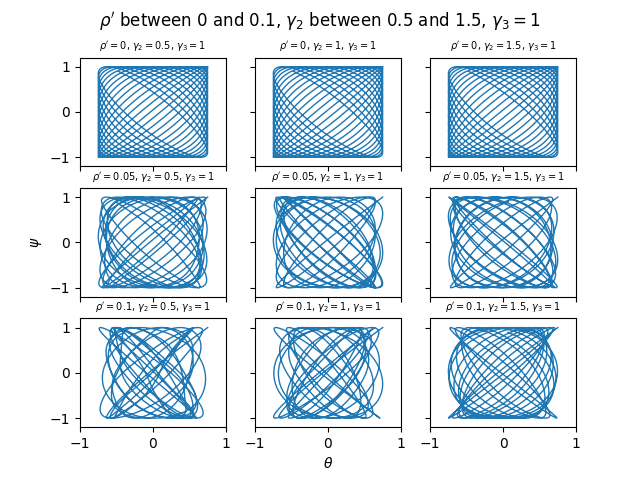

In [40]:
gridHarmPlots(bounds=[[-1,1],[-1.2,1.2]]);

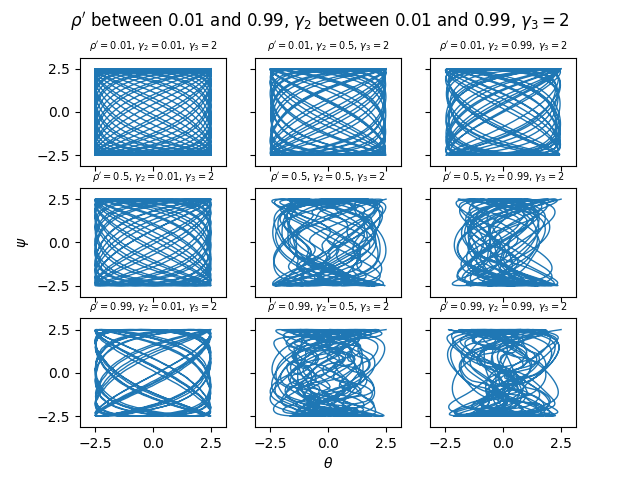

In [43]:
gridHarmPlots(ICs=[2.5,0,0,0,2.5,0], Params=[-1,-1,2],
             varVals={"p2":[0.01,0.5,0.99], "g2":[0.01,0.5,0.99]},
             stoptime=300);

In [42]:
plt.close("all")

In [ ]:
wsol, t, *x = sim([1.5,1,1,1,1,0], [0,1,1], stoptime=50.0, numpoints = 1000)
f,a=phasePlot(wsol, t, showφ=True, showψ=True)
a.set_title(r'$θ$ vs $\dot{θ}$, $\rho^\prime=0$, $γ_2=γ_3=1$');
# wsol, t = sim([.5,0,1.75,0,1,0], [.5,1,1], stoptime=100.0, numpoints = 1000)
# phasePlot(wsol, t);

In [ ]:
plt.close("all")
wsol1, t1, *x = sim([.5,0,1.25,0,1,0], [0,1,1], stoptime=100.0, numpoints = 500)
wsol2, t2, *x = sim([.5,0,1.75,0,1,0], [0,1,1], stoptime=100.0, numpoints = 500)
ani = harmAni([wsol1, wsol2], title=r"$\rho^\prime=0$ for different ICs")
ani.save("rho=0.gif")

In [ ]:
plt.close("all")
wsol1, t1, *x = sim([.5,0,0.75,0,1,0], [.999,1,1], stoptime=10.0, numpoints = 1000)
wsol2, t2, *x = sim([.5,0,0.75,0,1,0], [.99,1,1], stoptime=10.0, numpoints = 1000)
ani = harmAni([wsol1, wsol2], title=r"$\rho^\prime=0.999 and \rho^\prime=0.99$")
ani.save("rho=ish1.gif")

In [ ]:
plt.close("all")
wsol1, t1, *x = sim([.5,0,1.25,0,1,0], [0,1,1], stoptime=50.0, numpoints = 250)
wsol2, t2, *x = sim([.5,0,1.75,0,1,0], [0,1,1], stoptime=50.0, numpoints = 250)
phasePlot(wsol1, t2)
phasePlot(wsol2, t2)

In [ ]:
plt.close("all")
wsol1, t1, *x = sim([.49,0,1.75,0,1,0], [.5,1,1], stoptime=50.0, numpoints = 250)
wsol2, t2, *x = sim([.51,0,1.75,0,1,0], [.5,1,1], stoptime=50.0, numpoints = 250) #makes a heart-shape, sort of!
ani = harmAni([wsol1, wsol2])

In [ ]:
#do not touch, it makes a heart.
plt.close("all")
wsol2, t2, *x = sim([.51,0,1.75,0,1,0], [.5,1,1], stoptime=100.0, numpoints = 1000)
ani = harmAni([wsol2])
ani.save("heartHarm.gif")

In [ ]:
#eye, ish!
plt.close("all")
wsol2, t2, *x = sim([0.5,0,0.5,0,0,0.5], [0.01,1,1], stoptime=100.0, numpoints = 1000)
ani = harmAni([wsol2], bounds=[[-1,1],[-1,1]])

In [ ]:
pvals = [0, .05, .1]

In [ ]:
wsol, t, *x = sim([.5,0,1.75,0,1,0], [0,1,1], stoptime=100.0, numpoints = 1000)
phasePlot(wsol, t);
wsol, t, *x = sim([.5,0,1.75,0,1,0], [.05,1,1], stoptime=100.0, numpoints = 1000)
phasePlot(wsol, t);
wsol, t, *x = sim([.5,0,1.75,0,1,0], [.1,1,1], stoptime=100.0, numpoints = 1000)
phasePlot(wsol, t);

In [ ]:
wsol, t, *x = sim([.51,0,1.75,0,1,0], [.5,1,1], stoptime=1000.0, numpoints = 5000)
phasePlot(wsol, t, showφ=False, showψ=False);
# wsol, t, *x = sim([.5,0,1.75,0,1,0], [.5,1,1], stoptime=10.0, numpoints = 1000)
# phasePlot(wsol, t);

In [ ]:
plt.close("all")

In [ ]:
θtPlot(wsol1, t1)
θtPlot(wsol2, t2)

In [ ]:
wsol, t, *x = sim([.5,0,2.25,0,1,0], [.5,1,1], stoptime=50.0, numpoints = 250)
ani = harmAni([wsol])

In [ ]:
wsol, t, *x = sim([.5,0,2.25,0,1,0], [.5,1,1])
# θtPlot(wsol, t)

fig1, ax1 = plt.subplots(1)
θ = wsol[:,0]
x1 = wsol[:,1]
φ = wsol[:,2]
x2 = wsol[:,3]
ψ = wsol[:,4]
x3 = wsol[:,5]
ax1.plot(θ, ψ, 'b', linewidth=1)


In [ ]:
wsol, t, *x = sim([1,0,2.25,0,1,0], [.5,1,1])
θtPlot(wsol, t)

In [ ]:
#demonstration of chaos
wsol, t, *x = sim([1,0,2.25,0,1,0], [.5,1,1], stoptime=100.0, numpoints=1000)
θtPlot(wsol, t)
wsol, t, *x = sim([1.01,0,2.25,0,1,0], [.5,1,1], stoptime=100.0, numpoints=1000)
θtPlot(wsol, t)
wsol, t, *x = sim([1.0,0.01,2.25,0,1,0], [.5,1,1], stoptime=100.0, numpoints=1000)
θtPlot(wsol, t)

In [ ]:
#note that the stuff from theta3 does have an effect on theta 1 and 2, but I'm
#pretty sure that this is just because of numerical error in the DE solver,
#since these very different conditions for theta 3 only show divergence in theta1
#and theta2 after like tau=50, which is comparable/even higher than how long it
#takes when I add a miniscule amt. to the theta1 or theta2 ICs.
wsol, t, *x = sim([1,0,2.25,0,1,0], [.5,1,1], stoptime=100.0, numpoints=1000)
θtPlot(wsol, t)
wsol, t, *x = sim([1,0,2.25,0,5,2], [.5,1,1], stoptime=100.0, numpoints=1000)
θtPlot(wsol, t)

In [ ]:
wsol, t, *x = sim([1,0,0,0,1.5,0], [0,1,1], stoptime=100.0, numpoints=1000)
θtPlot(wsol, t)

wsol, t, *x = sim([1,0,1,0,1.5,0], [0,1,1], stoptime=100.0, numpoints=1000)
θtPlot(wsol, t)



In [ ]:
#TODO: better captions / titles / etc on graphs

#TODO: theta1=theta; theta2=phi; theta3=psi